# Step  #3: Visualization 
## Visualization and Exploratory Data Analysis

## About this step
In this step, I'll visualize the data by presenting it in several graphs and plotting it on a map to see the various correlations between the columns.

This will aid in research and a thorough comprehension of the information.

### import modules (packages)

In [1]:

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt      
import math
import seaborn as sns
from collections import Counter
from sklearn.decomposition import PCA
from scipy.stats import chi2_contingency
import nltk
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud
%matplotlib inline

### Load the Data of Terrorism dataset after cleaning

In [2]:
df = pd.read_csv('data_of_terrorism_after_cleaning.csv')


In [3]:
df.drop(columns = 'Unnamed: 0', inplace=True, axis=1)

#### I'll make a list of colors that will aid me in presenting red-hued visualizations.

In [4]:
Red_colors = ["maroon","firebrick","red","indianred", "lightcoral", "salmon", "tomato", "coral","darksalmon","orangered","chocolate","orange", "pink", "sienna", "tan", "saddlebrown", "peru", "rosybrown", "plum", "palevioletred", "deeppink", "mediumvioletred", "hotpink" ]


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28614 entries, 0 to 28613
Data columns (total 25 columns):
CITY                                         28614 non-null object
COUNTRY                                      28614 non-null int64
Claimed Responsibility                       28614 non-null int64
DATE                                         28614 non-null float64
FATALITIES                                   28614 non-null int64
Group Name of Perpetrator Group              14608 non-null object
Hostages                                     28614 non-null float64
INJURED                                      28614 non-null int64
LOCATION DETAILS                             13153 non-null object
Name of Entity                               28614 non-null object
Nationality of Target                        28614 non-null object
Number of Perpetrator Fatalities             28614 non-null int64
PERPETRATOR GROUP                            14608 non-null object
PROVINCE/ADMINISTRATIVE

#### Now I'll show you the number of terrorist occurrences by country.

Text(0.5,1,'Number of terrorist attacks by country')

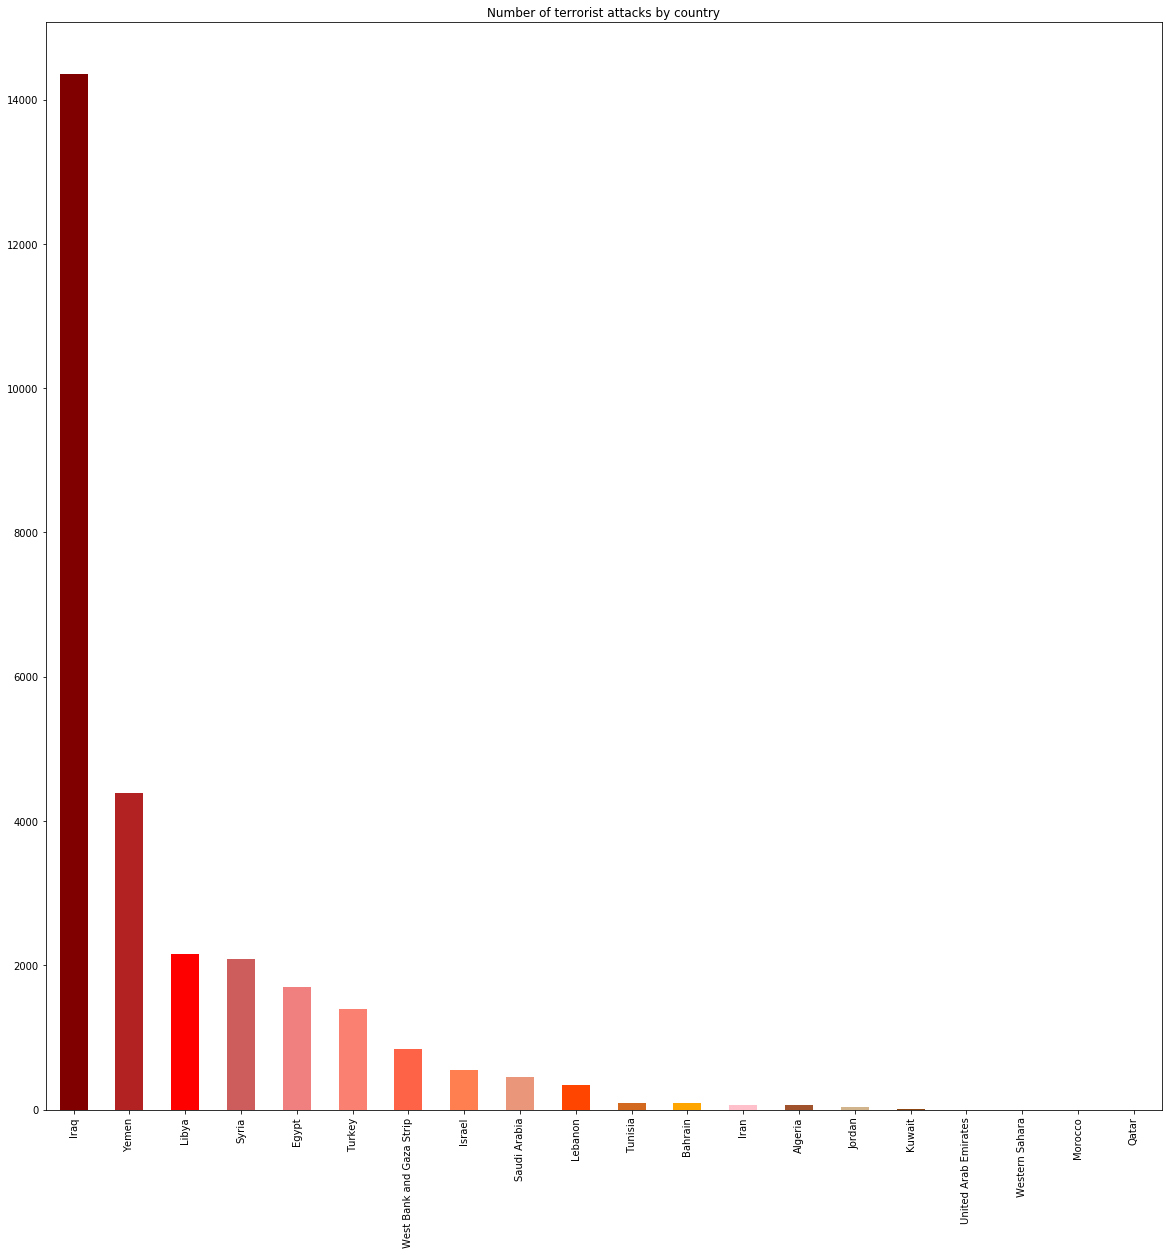

In [6]:
dict_of_countries = {0 : 'Iraq' ,1 : 'Syria',2 : 'Yemen',3 : 'Egypt',4 : 'Saudi Arabia',5 : 'Israel',6 : 'Libya',7 : 'West Bank and Gaza Strip',8 : 'Turkey',9 : 'Lebanon',10 : 'Jordan',11 : 'Tunisia',12 : 'Iran',13 : 'Morocco',14 : 'Algeria',15 : 'Western Sahara',16 : 'Bahrain',17 : 'Kuwait',18 : 'Qatar',19 : 'United Arab Emirates'} 
countries = ['Iraq', 'Syria','Yemen', 'Egypt','Saudi Arabia', 'Israel', 'Libya', 'West Bank and Gaza Strip', 'Turkey', 'Lebanon', 'Jordan', 'Tunisia', 'Iran', 'Morocco', 'Algeria', 'Western' 'Sahara', 'Bahrain', 'Kuwait', 'Qatar', 'United Arab Emirates']
df["COUNTRY"].replace(dict_of_countries).value_counts().plot(kind='bar',color = Red_colors,figsize=(20, 20))
plt.title('Number of terrorist attacks by country')

#### I'll now compare the number of terrorist occurrences in each country to the number of terrorist occurrences in other countries.

Text(0.5,1,'Number of terrorist attacks by country')

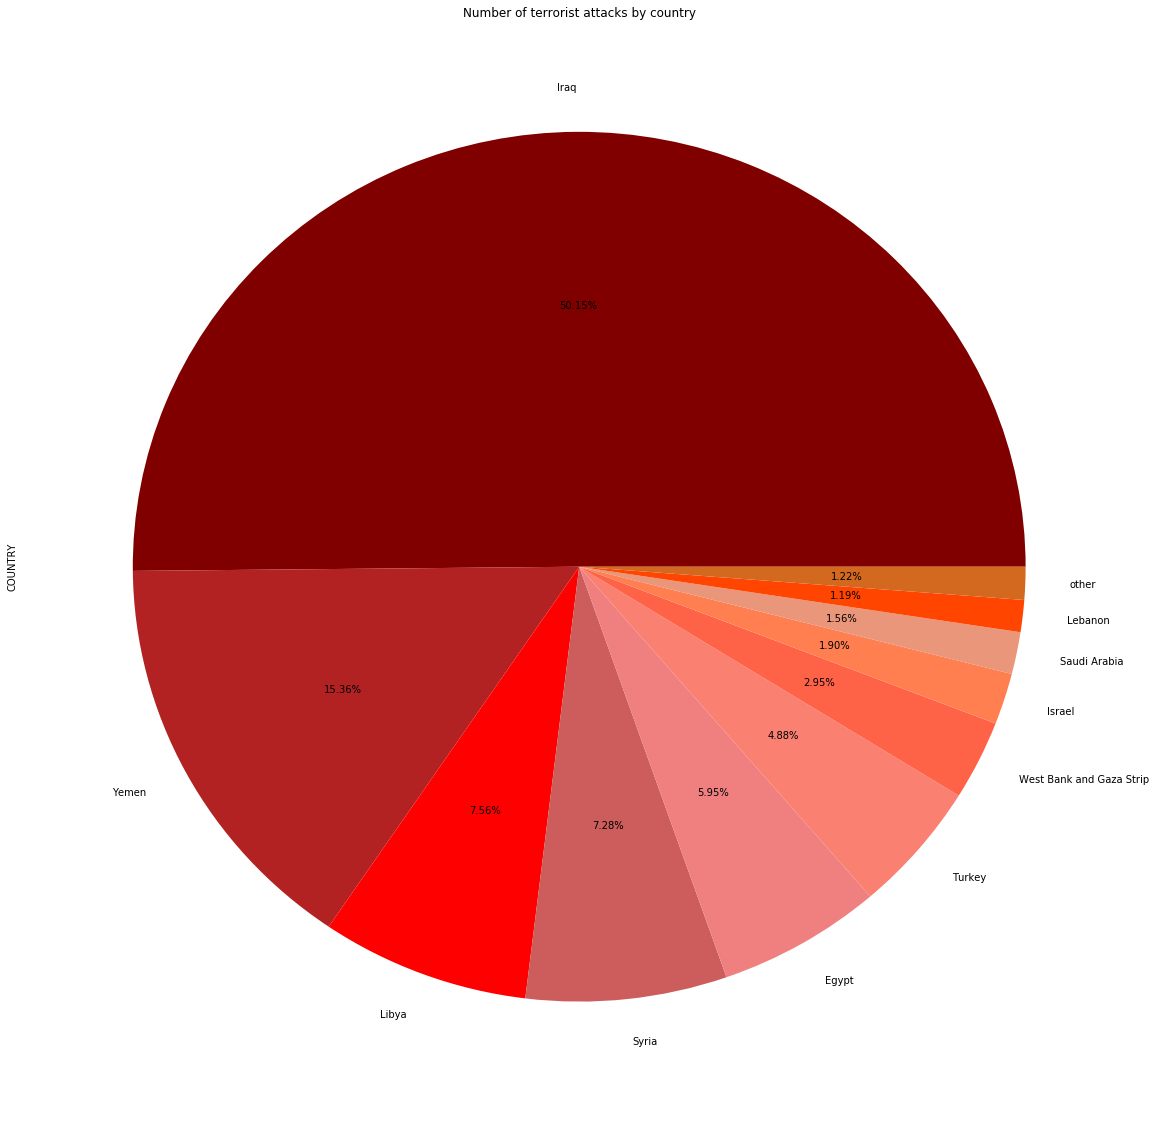

In [7]:
df2 = df["COUNTRY"].replace(dict_of_countries).value_counts()
df2["other"] = 0
count = 0  
count = df.shape[0]
remove = []
for COUNTRY in df2.index:
    pigoin = df2[COUNTRY]
    if(pigoin <= (count / 100)):
        remove.append(COUNTRY)
        df2["other"] = df2["other"] + pigoin 
    
df2 = df2.drop(index=remove)
df2.plot(kind='pie',figsize=(20, 20),autopct="%.2f%%",colors = Red_colors)
plt.title('Number of terrorist attacks by country')

#### I'll now analyze each sort of terrorist attack and how it relates to the others.

Text(0.5,1,'Number of terrorist attacks by Type of Attack')

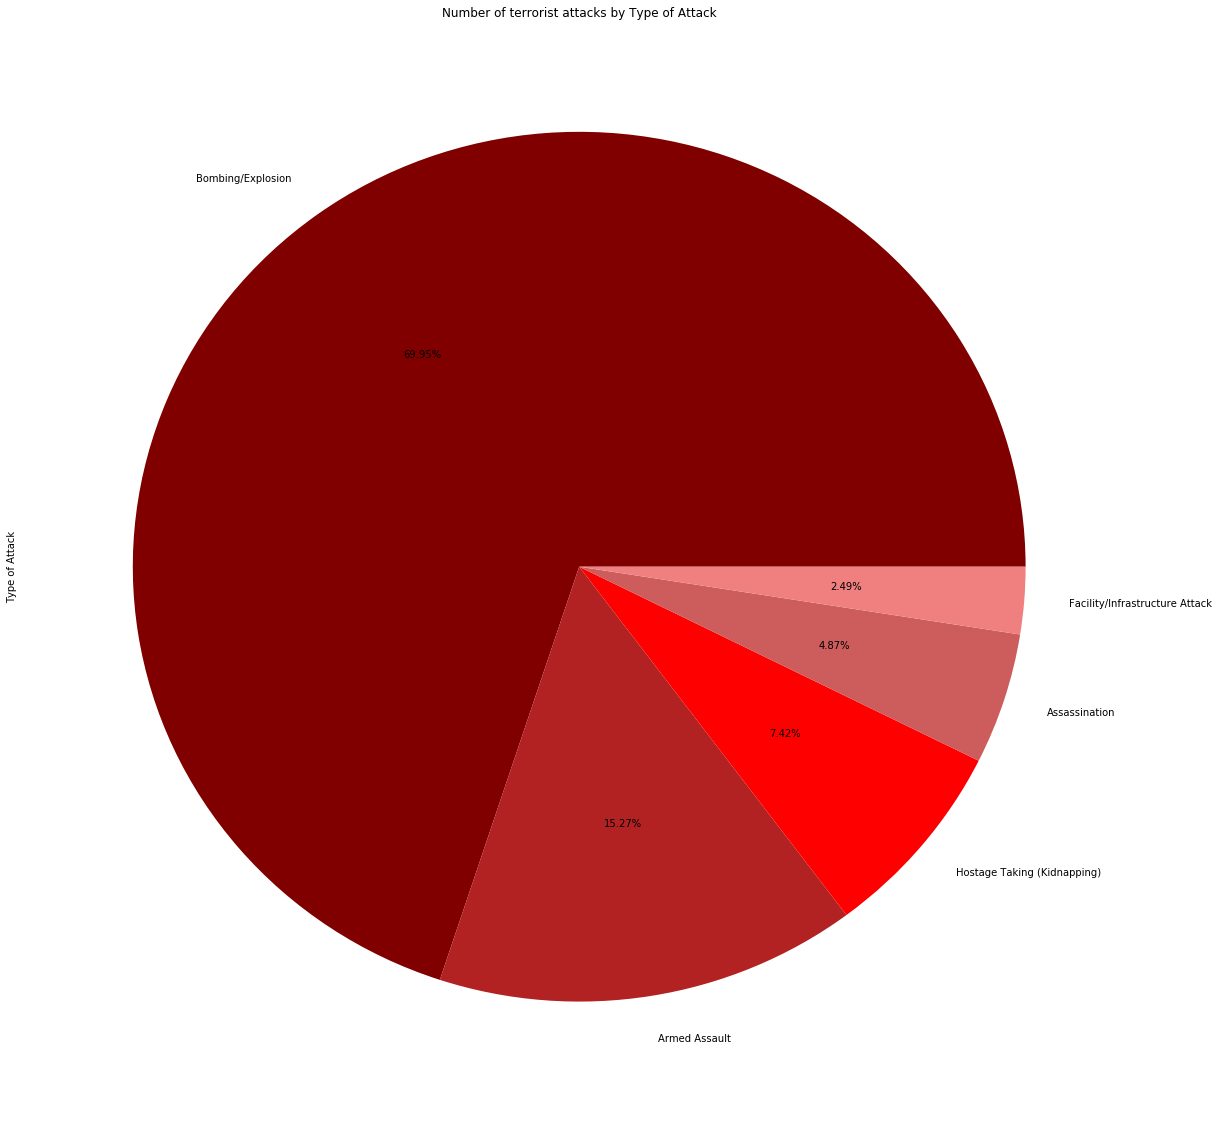

In [8]:
dict_of_Type_of_Attack = {0:"Bombing/Explosion",1:"Facility/Infrastructure Attack",2:"Armed Assault",3:"Hostage Taking (Kidnapping)",4:"Assassination",5:"Hostage Taking (Barricade Incident)",6:"Hijacking",7:"Unarmed Assault"}

df2 = df["Type of Attack"].replace(dict_of_Type_of_Attack).value_counts()
df2["other"] = 0
count = 0  
count = df.shape[0]
remove = []
for COUNTRY in df2.index:
    pigoin = df2[COUNTRY]
    if(pigoin <= (count / 100)):
        remove.append(COUNTRY)
        df2["other"] = df2["other"] + pigoin 
    
df2 = df2.drop(index=remove)
df2.plot(kind='pie',figsize=(20, 20),autopct="%.2f%%",colors = Red_colors)
plt.title('Number of terrorist attacks by Type of Attack')


#### I'll now display the proportion of terrorist occurrences for each target nation.

Text(0.5,1,'Number of terrorist attacks by Nationality of Target')

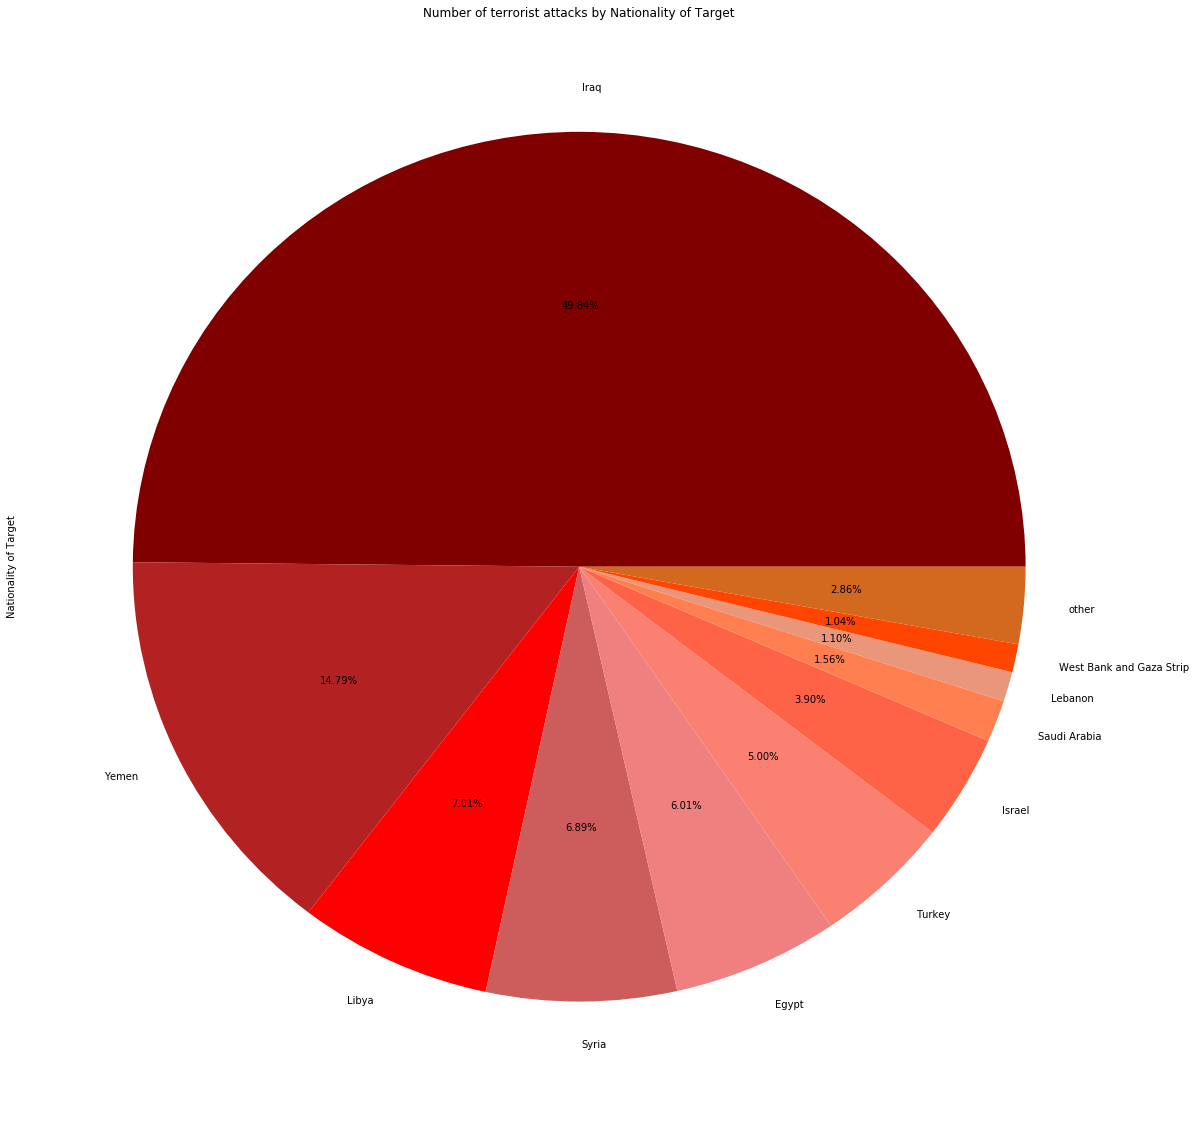

In [9]:
df4 = df["Nationality of Target"].value_counts()
df4["other"] = 0
count = df.shape[0]
remove = []
for Nationality in df4.index:
    pigoin = df4[Nationality]
    if(pigoin <= (count / 100)):
        remove.append(Nationality)
        df4["other"] = df4["other"] + pigoin 
    
df4 = df4.drop(index=remove)
df4.plot(kind='pie',figsize=(20, 20),autopct="%.2f%%",colors = Red_colors)
plt.title('Number of terrorist attacks by Nationality of Target')



#### Compare the number of casualties to the number of people who have died.

Text(0.5,1,'The number of people killed or injured in terrorist acts')

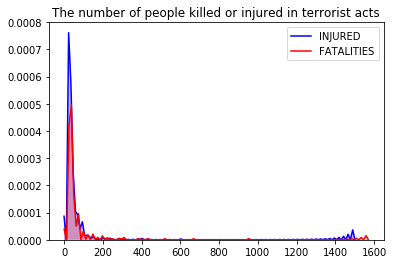

In [10]:
sns.kdeplot(df["INJURED"], shade=True,color = "b")
sns.kdeplot(df["FATALITIES"], shade=True,color = "r")
plt.title('The number of people killed or injured in terrorist acts')

#### Compare the number of casualties to the number of people who have died (Up to 15 people ).

Text(0.5,1,'The number of people killed or injured in terrorist acts(Up to 15 people )')

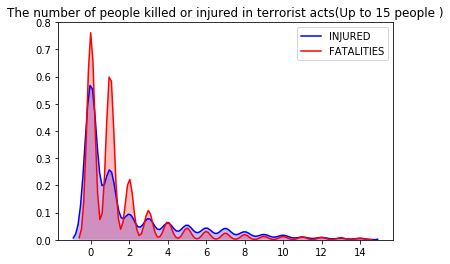

In [11]:
sns.kdeplot(df["INJURED"][df["INJURED"]<15], shade=True,color = "b")
sns.kdeplot(df["FATALITIES"][df["FATALITIES"]<15], shade=True,color = "r")
plt.title('The number of people killed or injured in terrorist acts(Up to 15 people )')

#### Now compare the attack type to the weapon type.

Text(0.5,1,'The relationship between the type of weapon and the type of attack')

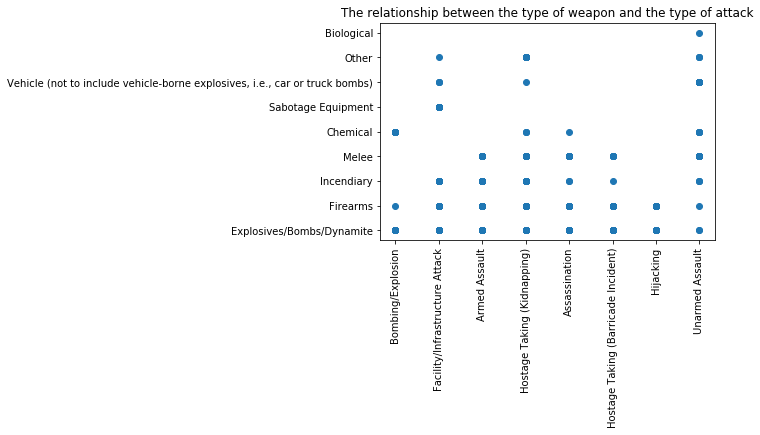

In [12]:
dict_of_Type_of_Attack = {0:"Bombing/Explosion",1:"Facility/Infrastructure Attack",2:"Armed Assault",3:"Hostage Taking (Kidnapping)",4:"Assassination",5:"Hostage Taking (Barricade Incident)",6:"Hijacking",7:"Unarmed Assault"}
xlabels = ["Bombing/Explosion","Facility/Infrastructure Attack","Armed Assault","Hostage Taking (Kidnapping)","Assassination","Hostage Taking (Barricade Incident)","Hijacking","Unarmed Assault"]
dict_of_Weaponֹ_Type = {0:"Explosives/Bombs/Dynamite",1:"Firearms",2:"Incendiary",3:"Melee",4:"Chemical",5:"Sabotage Equipment",6:"Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)",7:"Other",8:"Biological"}

plt.scatter(df["Type of Attack"].replace(dict_of_Type_of_Attack),df["Weapon Type"].replace(dict_of_Weaponֹ_Type))
plt.xlabel=("Type of Attack")
plt.ylabel=("Weapon Type")
plt.xticks( xlabels, rotation='vertical')
plt.title("The relationship between the type of weapon and the type of attack")

#### I'll look into whether there's a link between the amount of fatalities and if it's a suicide.

In [13]:
ct2 = pd.crosstab(df["FATALITIES"],df["Suicide_Attack"])



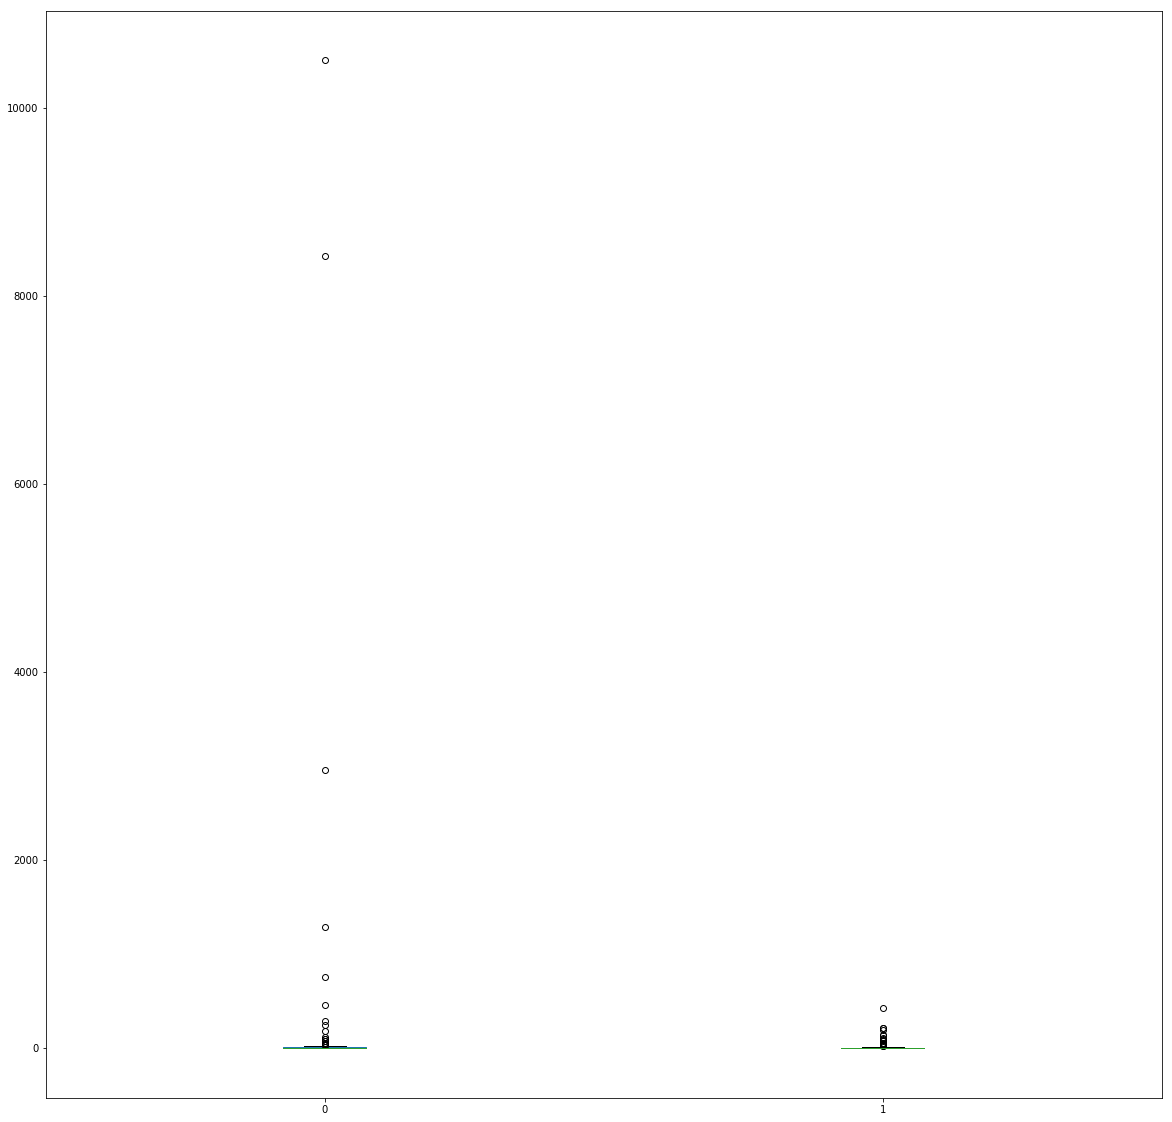

In [14]:
ct2.plot(kind="box",figsize=(20, 20))


##### Test using chi2 contingency test whether a connection between the number of deaths and the mother of the attack is suicide

In [15]:
if chi2_contingency(ct2)[1] >= 0.05:
    print("There is a link between the number of deaths and whether the attack is suicide")
else:
    print("There is no connection between the number of deaths and whether the attack is suicide")

There is no connection between the number of deaths and whether the attack is suicide


#### I'll look into if there's a link between captives and ransom demands.

In [16]:
ct3 = pd.crosstab(df["Ransom"],df["Hostages"],normalize="index")

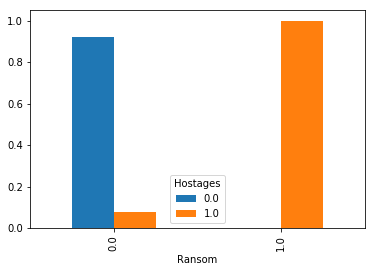

In [17]:
ct3.plot(kind="bar")

In [18]:
if chi2_contingency(ct3)[1] >= 0.05:
    print("There is a connection between demanding ransom and taking hostages")
else:
    print("There is no connection between demanding ransom and taking hostages")

There is a connection between demanding ransom and taking hostages


#### Now I'll show you the number of terrorist occurrences by  type of Attack.

Text(0.5,1,'Amount of attacks by type of Attack')

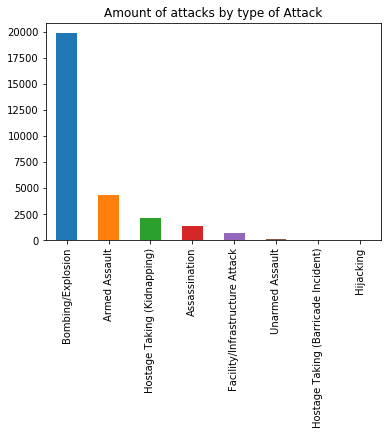

In [19]:
dict_of_Type_of_Attack = {0:"Bombing/Explosion",1:"Facility/Infrastructure Attack",2:"Armed Assault",3:"Hostage Taking (Kidnapping)",4:"Assassination",5:"Hostage Taking (Barricade Incident)",6:"Hijacking",7:"Unarmed Assault"}
xlabels = ["Bombing/Explosion","Facility/Infrastructure Attack","Armed Assault","Hostage Taking (Kidnapping)","Assassination","Hostage Taking (Barricade Incident)","Hijacking","Unarmed Assault"]

df["Type of Attack"].replace(dict_of_Type_of_Attack).value_counts().plot(kind='bar')
plt.title('Amount of attacks by type of Attack')
# plt.xticks(xlabels, rotation='vertical')


#### Now I'll show you the number of terrorist occurrences by  type of Weapon.

Text(0.5,1,'Amount of attacks by type of Weapon')

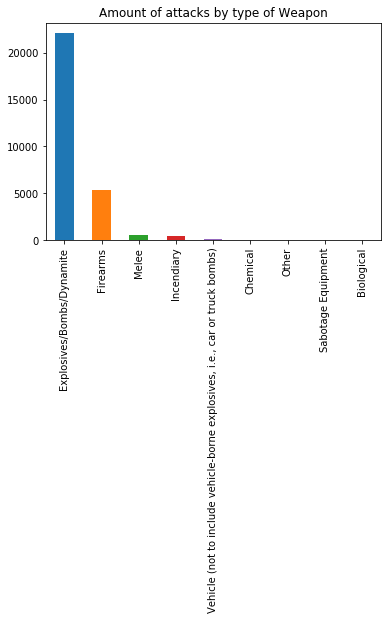

In [20]:
df["Weapon Type"].replace(dict_of_Weaponֹ_Type).value_counts().plot(kind='bar')
plt.title('Amount of attacks by type of Weapon')

#### Now I'll show you how many terrorist attacks there were based on the weapon used.

Text(0.5,1,'Amount of attacks by sub type of Weapon')

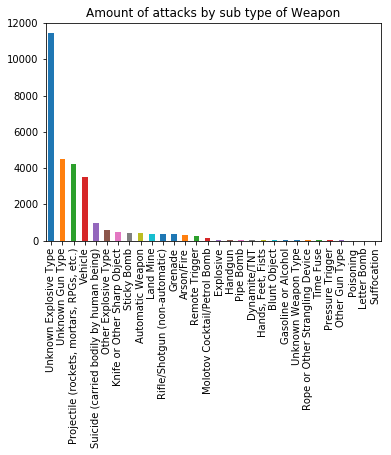

In [21]:
dict_of_Weaponֹ_Sub_Type = {0:"Unknown Explosive Type",1 : "Automatic Weapon",2 : "Unknown Gun Type",3 : "Projectile (rockets, mortars, RPGs, etc.)",4 : "Vehicle",5 : "Sticky Bomb",6 : "Land Mine",7 : "Remote Trigger",8 : "Rifle/Shotgun (non-automatic)",9 : "Suicide (carried bodily by human being)",10 : "Molotov Cocktail/Petrol Bomb",11 : "Knife or Other Sharp Object",12 : "Unknown Weapon Type",13 : "Arson/Fire",14 : "Grenade",15 : "Handgun",16 : "Other Explosive Type",17 : "Pipe Bomb",18 : "Blunt Object",19 : "Dynamite/TNT",20 : "Rope or Other Strangling Device",21 : "Time Fuse",22 : "Hands, Feet, Fists",23 : "Explosive",24 : "Poisoning",25 : "Pressure Trigger",26 : "Suffocation",27 : "Gasoline or Alcohol",28 : "Other Gun Type",29 : "Letter Bomb"}
df["Weapon Sub_type"].replace(dict_of_Weaponֹ_Sub_Type).value_counts().plot(kind='bar')
plt.title('Amount of attacks by sub type of Weapon')



### Now I'll show you a graphical representation of the terrorist occurrences on a map.

#### On a map, several types of terrorist incidents are depicted.

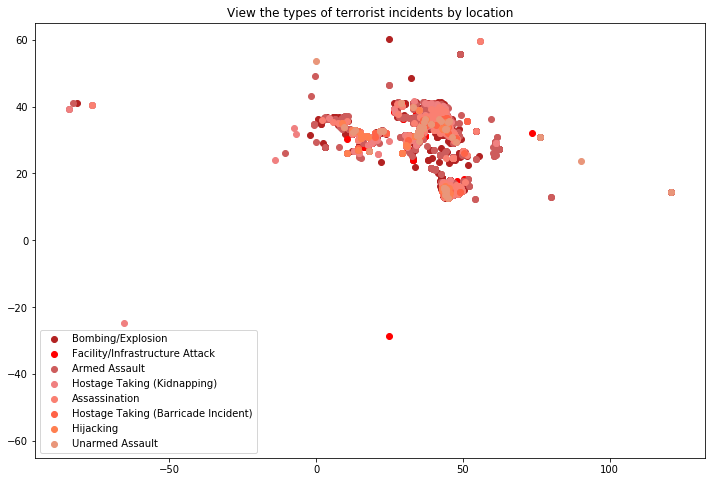

In [22]:
fig = plt.figure(figsize=(12,8))
ax = plt.axes()
ax.set_ylim(-65,65)

i = 1
for Type_of_Attack  in df["Type of Attack"].unique():
    ax.scatter(df.longitude[df["Type of Attack"] == Type_of_Attack],df.latitude[df["Type of Attack"] == Type_of_Attack], c=Red_colors[i],marker='o')
    i = i+1
ax.legend(labels=df["Type of Attack"].unique())

plt.title('View the types of terrorist incidents by location')
ax.legend(labels=['Bombing/Explosion', 'Facility/Infrastructure Attack', 'Armed Assault', 'Hostage Taking (Kidnapping)', 'Assassination', 'Hostage Taking (Barricade Incident)', 'Hijacking', 'Unarmed Assault' ])

#### Suicide cases, not suicides, are depicted on a map.

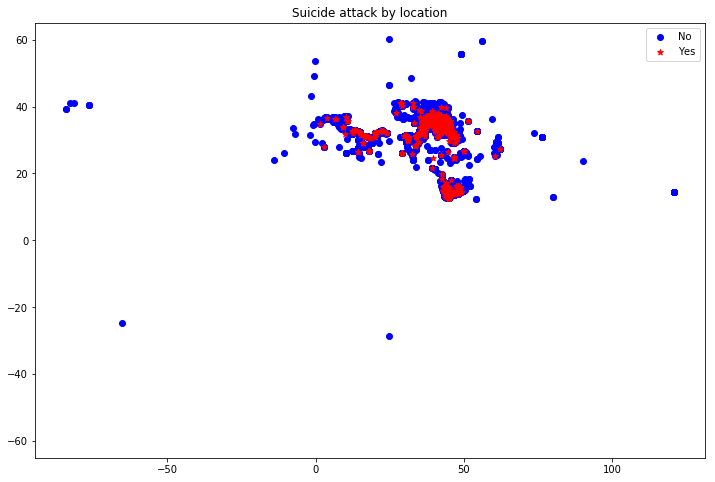

In [23]:
fig = plt.figure(figsize=(12,8))
ax = plt.axes()
ax.set_ylim(-65,65)
# ax.set_xlim(-90,90)

ax.scatter(df.longitude[df.Suicide_Attack == 0],df.latitude[df.Suicide_Attack == 0], c="b",marker='o')
ax.scatter(df.longitude[df.Suicide_Attack == 1],df.latitude[df.Suicide_Attack == 1], c="r",marker='*')

plt.title('Suicide attack by location')
ax.legend(labels=['No', 'Yes'])

#### On the map, events that have had an influence on the environment and those that have not

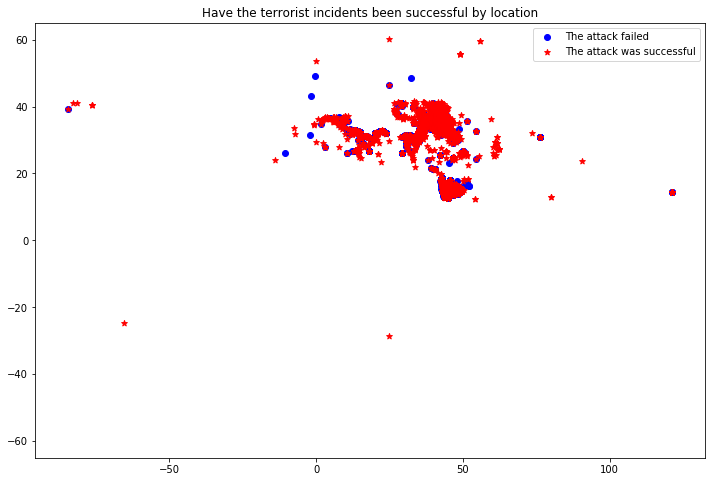

In [24]:
fig = plt.figure(figsize=(12,8))
ax = plt.axes()
ax.set_ylim(-65,65)
# ax.set_xlim(-90,90)

ax.scatter(df.longitude[df['Successful Attack?'] == 0],df.latitude[df['Successful Attack?'] == 0], c="b",marker='o',label='The attack failed')
ax.scatter(df.longitude[df['Successful Attack?'] == 1],df.latitude[df['Successful Attack?'] == 1], c="r",marker='*',label='The attack was successful')

plt.title('Have the terrorist incidents been successful by location')
ax.legend(labels=['The attack failed', 'The attack was successful'])

#### Comparison of the number of people killed and injured in different types of terrorist attacks

    The number of wounds is represented on the horizontal axis.
    The number of deaths is represented on the vertical axis.

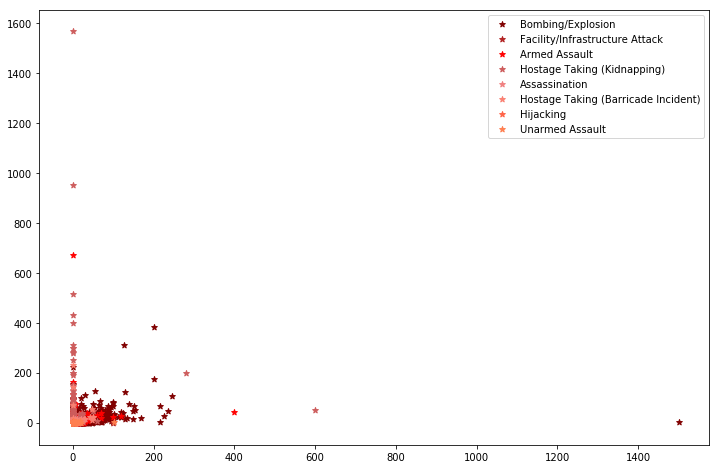

In [25]:
fig = plt.figure(figsize=(12,8))
ax = plt.axes()
for i in range(len(df['Type of Attack'].unique())):
    plt.scatter(x=df[df['Type of Attack'] == i]["INJURED"],y=df[df['Type of Attack'] == i]["FATALITIES"],c=Red_colors[i],marker='*',label=df['Type of Attack'].unique()[i])
plt.legend(numpoints=1,loc=4)
# plt.xlabel("INJURED")
# plt.ylabel("FATALITIES")
ax.legend(labels=df["Type of Attack"].unique())
ax.legend(labels=['Bombing/Explosion', 'Facility/Infrastructure Attack', 'Armed Assault', 'Hostage Taking (Kidnapping)', 'Assassination', 'Hostage Taking (Barricade Incident)', 'Hijacking', 'Unarmed Assault' ])
plt.show()

#### Comparison of the number of people killed and injured in different types of target

    The number of wounds is represented on the horizontal axis.
    The number of deaths is represented on the vertical axis.

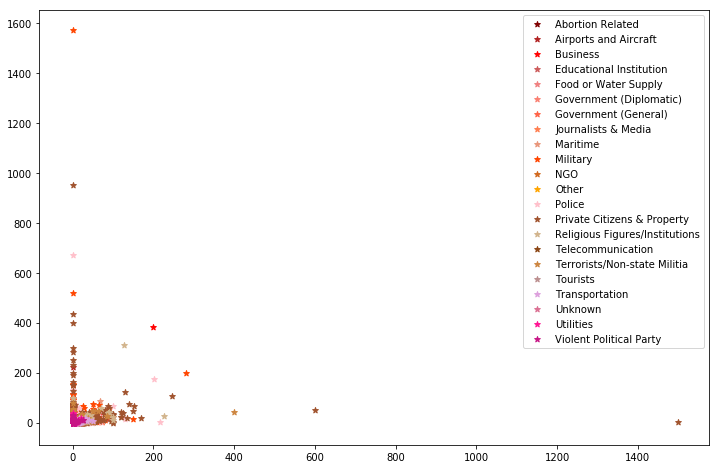

In [26]:
Target_Types = ['Abortion Related','Airports and Aircraft','Business', 'Educational Institution', 'Food or Water Supply', 'Government (Diplomatic)', 'Government (General)' ,'Journalists & Media', 'Maritime', 'Military', 'NGO', 'Other', 'Police',  'Private Citizens & Property', 'Religious Figures/Institutions', 'Telecommunication', 'Terrorists/Non-state Militia', 'Tourists', 'Transportation', 'Unknown', 'Utilities',  'Violent Political Party' ]
fig = plt.figure(figsize=(12,8))
ax = plt.axes()
i = 0
for Type in Target_Types:
    plt.scatter(x=df[df['TARGET TYPE'] == Type]["INJURED"],y=df[df['TARGET TYPE'] == Type]["FATALITIES"],c=Red_colors[i],marker='*',label=Type)
    i = i+1
plt.legend(numpoints=1,loc=4)
# plt.xlabel("INJURED")
# plt.ylabel("FATALITIES")
ax.legend(labels=df["Type of Attack"].unique())
ax.legend(labels=Target_Types)
plt.show()

#### I'll make a array of counters for various sorts of targets,
#### fill it with table data (there are occurrences that have influenced many targets), 
#### and display it in a bar graph.

In [27]:
data = [0]*len(Target_Types)

ser = pd.Series(data, index =Target_Types)

for i in range(df.shape[0]):
    for Type in Target_Types:
        if (Type in df['TARGET TYPE'][i]):
            ser[Type] = ser[Type] + 1



Text(0.5,1,'Amount of attacks by Target Types')

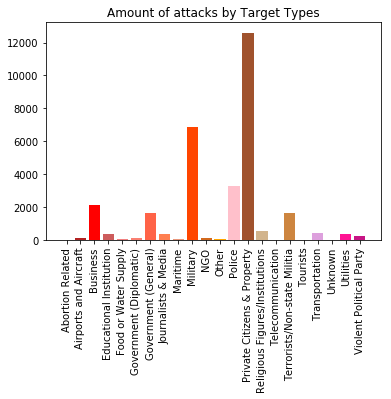

In [28]:
plt.bar(ser.index, ser, color=Red_colors)
plt.xticks( ser.index, rotation='vertical')

plt.title('Amount of attacks by Target Types')


#### I'll look at the text in the column that contains information on the attacked target, and I'll see which terms appear the most frequently.
#### In the form of a bar graph and a cloud of words

In [29]:
Specific_Description_text = []
for i in range(df.shape[0]):
    txt = df['Specific Description'][i].strip().lower()
    if  type(txt) == type("string"):
        Specific_Description_text.append(txt)
text = " ".join(Specific_Description_text)


In [30]:
vectorizer=CountVectorizer(stop_words="english")
freq_vec=vectorizer.fit_transform([text]).toarray() # the function requires as input an array of docs..
freqDist=dict(zip(vectorizer.get_feature_names(),freq_vec[0])) # create a dictionary from the first (and only) row
freqDist=dict(sorted(freqDist.items(), key=lambda item: item[1],reverse=True)) # ascending sort..

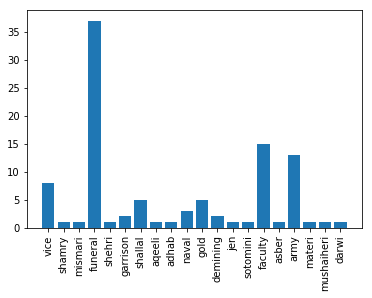

In [31]:
topK=20
plt.bar(list(freqDist.keys())[:topK], list(freqDist.values())[:topK])
plt.xticks(list(freqDist.keys())[:topK], rotation='vertical')
plt.show()

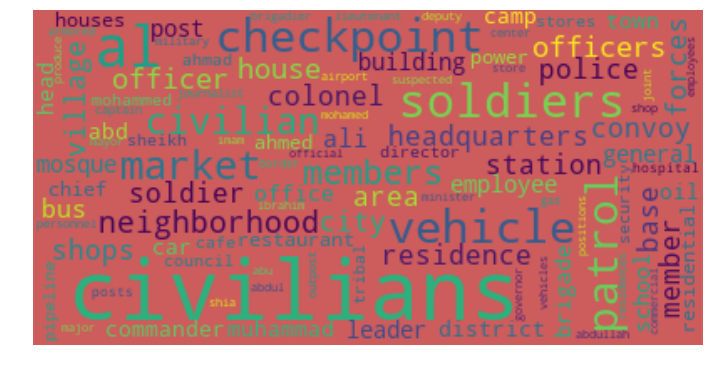

In [32]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="indianred").generate_from_frequencies(freqDist)
plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

#### To investigate the following questions, I'll use the scatter matrix function to create a matrix of scatter plots:
- Is there a link between the success of an assault and the number of people killed or injured?
- Is there a link between the sort of assault and the weapon employed, as well as the weapon itself?

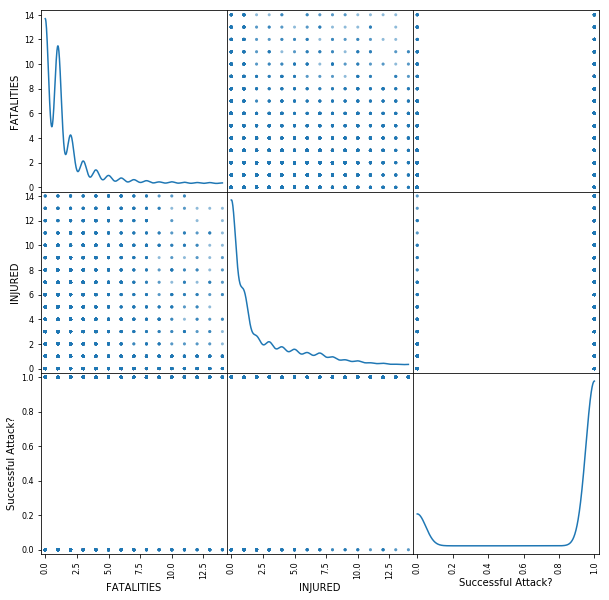

In [33]:
df1 = df[df["FATALITIES"]<15].copy()
df1 = df1[df1["INJURED"]<15]
pd.plotting.scatter_matrix(df1[[ 'FATALITIES', 'INJURED','Successful Attack?']], figsize=(10, 10), diagonal='kde')
plt.show()

In [34]:
X_Weapon = df[[ 'Type of Attack', 'Weapon Sub_type','Weapon Type',"PERPETRATOR GROUP"]].copy()

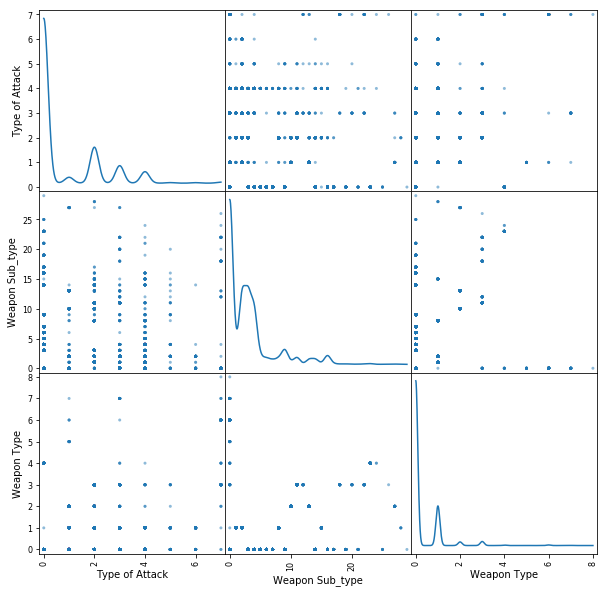

In [35]:
pd.plotting.scatter_matrix(X_Weapon, figsize=(10, 10), diagonal='kde')
plt.show()